In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [47]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta.values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [49]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)
#reg.coef_
# reg.intercept_ 
#reg.predict(np.array([[3, 5]]))b

In [50]:
reg.score(X_train,y_train)


0.006868759947181169

In [51]:
print('Coefficients budget: \n', reg.coef_[0])
print('Coefficients revenue: \n', reg.coef_[1])
print('Coefficients popularity: \n', reg.coef_[2])
print('Coefficients runtime: \n', reg.coef_[3])
print('Coefficients castRevBudRatio: \n', reg.coef_[4])

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients budget: 
 -0.41784900447568313
Coefficients revenue: 
 -0.00015005921934583923
Coefficients popularity: 
 1.835358863701979e-05
Coefficients runtime: 
 -420.13121565225276
Coefficients castRevBudRatio: 
 -107.64055338590464
Mean squared error: 1507176462.02
Variance score: -0.33


In [17]:
#number = []
b = []
r =[]
p=[]
run = []
castrb = []
for i in range(0,len(X_test)):
    #number.append(i)
    b.append(X_test[i][0]) #budget
    r.append(X_test[i][1]) #revenue
    p.append(X_test[i][2]) #popularity
    run.append(X_test[i][3]) #runtime
    castrb.append(X_test[i][4]) #castRevBudRatio


Text(0.5,0,'budget')

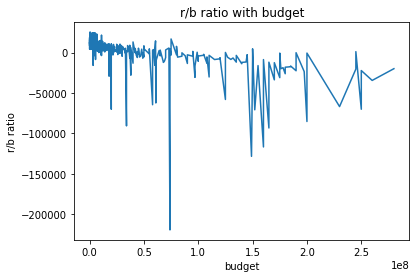

In [23]:
b_sorted, y_pred_sorted = zip(*sorted(zip(b, y_pred)))
plt.plot(b_sorted,y_pred_sorted)
plt.title("r/b ratio with budget")
plt.ylabel("r/b ratio")
plt.xlabel("budget")

Text(0.5,0,'revenue')

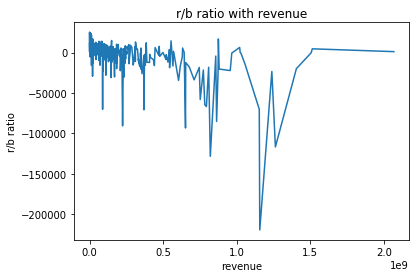

In [22]:
r_sorted, y_pred_sorted = zip(*sorted(zip(r, y_pred)))
plt.plot(r_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("revenue")

Text(0.5,0,'popularity')

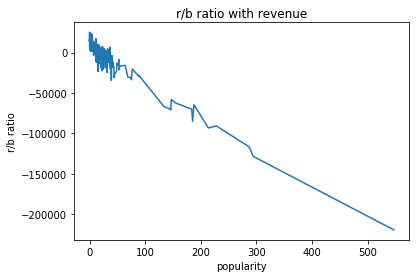

In [24]:
p_sorted, y_pred_sorted = zip(*sorted(zip(p, y_pred)))
plt.plot(p_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("popularity")

Text(0.5,0,'runtime')

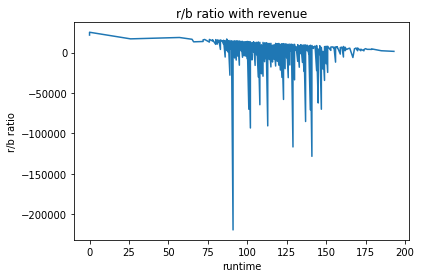

In [25]:
run_sorted, y_pred_sorted = zip(*sorted(zip(run, y_pred)))
plt.plot(run_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("runtime")

Text(0.5,0,'castrb')

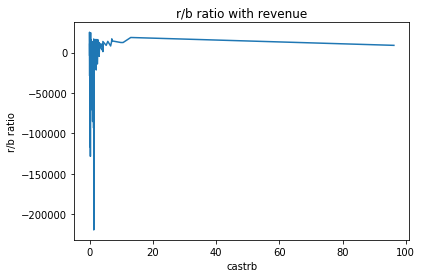

In [26]:
castrb_sorted, y_pred_sorted = zip(*sorted(zip(castrb, y_pred)))
plt.plot(castrb_sorted,y_pred_sorted)
plt.title("r/b ratio with revenue")
plt.ylabel("r/b ratio")
plt.xlabel("castrb")

In [27]:
castrb

[1.6291695671408586,
 0.0,
 0.0,
 1.7455371932568458,
 0.4604500140244602,
 0.5136621574886816,
 0.7246955165790558,
 0.5634120305096157,
 0.5999333819994279,
 0.4351270056381452,
 2.0968972581253613,
 0.9926817767013332,
 3.0399979018509438,
 0.8499540581913576,
 0.6977247501898328,
 0.608638395120459,
 0.3375094286974049,
 0.0,
 0.8360886856205368,
 0.36061982857142855,
 0.5391620931409272,
 0.26438777823949555,
 0.2684805295144758,
 0.4748869413079924,
 0.38443534201353496,
 0.3006297916614313,
 0.0,
 0.9902657793939392,
 0.8648342723408888,
 96.25694736647287,
 0.0,
 0.0,
 0.6008130640284978,
 0.25,
 0.7173351320451334,
 1.211775265735043,
 3.0310197530021203,
 0.255050133816837,
 1.311286860069894,
 0.0,
 0.7201980475616696,
 0.11965056710121888,
 0.15135394087301587,
 0.8378432426020408,
 0.21823561193945906,
 2.2362789155738185,
 0.6169012570582258,
 1.472755852337737,
 0.2863946372633196,
 1.062309334160784,
 2.305733201195312,
 0.2333882594052877,
 0.09132335958504803,
 1.8484